In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('student_habits_performance.csv')
dataset.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
sns.set(style='whitegrid')

In [4]:
dataset.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
dataset.dropna(inplace = True)
dataset.isna().sum()

#dataset.duplicated().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [18]:
dataset.describe(include = 'object').columns
#dataset.describe(include = 'number').columns

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [19]:
categorical_col = ['gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation']

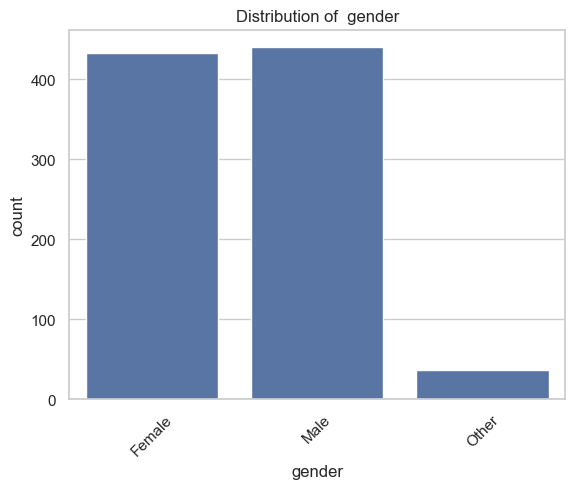

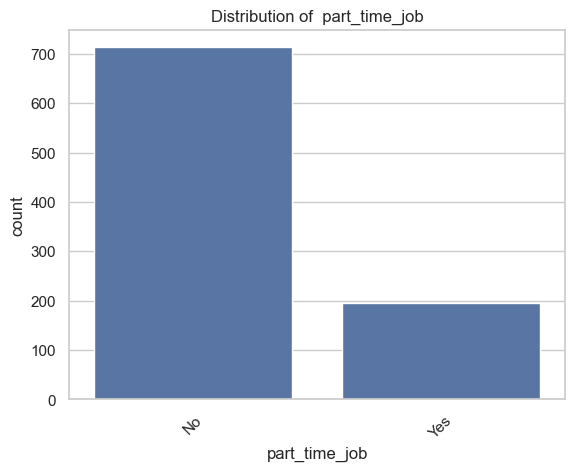

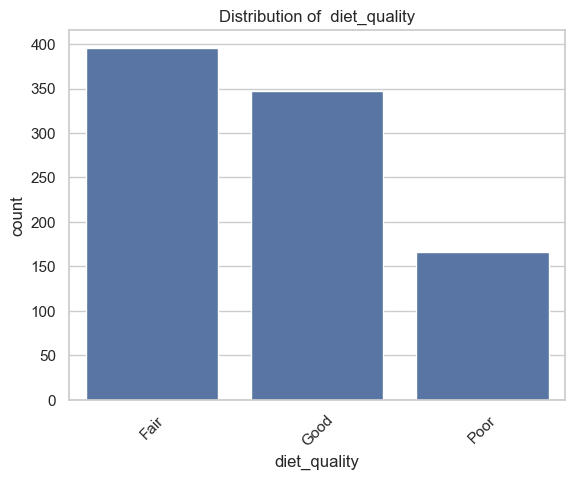

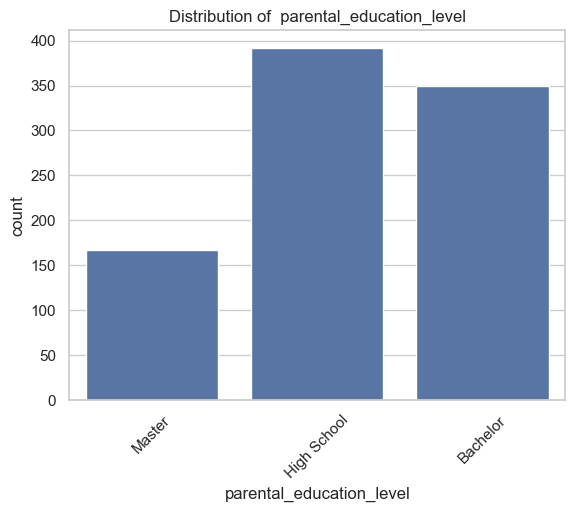

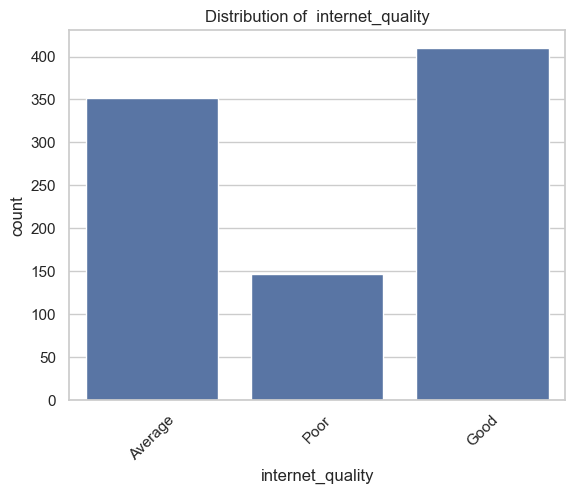

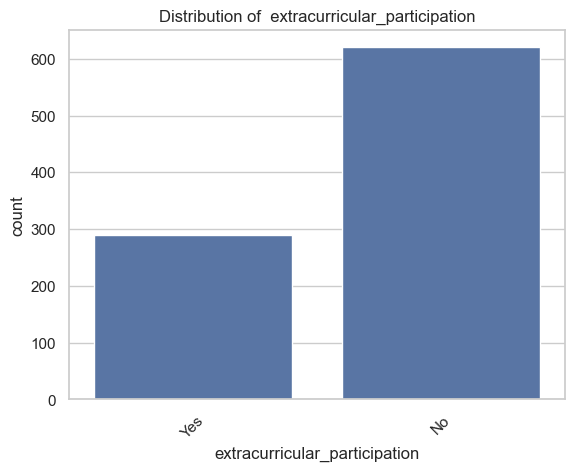

In [20]:
for column in categorical_col:
    sns.countplot(data=dataset, x = column)
    plt.title(f'Distribution of  {column}')
    plt.xticks(rotation=45)
    plt.show()

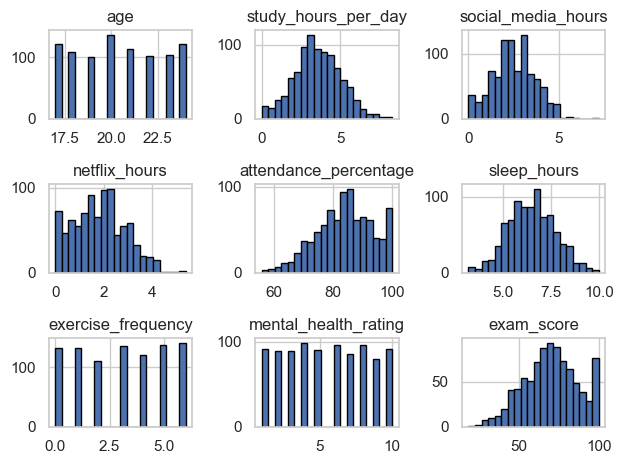

In [9]:
dataset.hist(bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

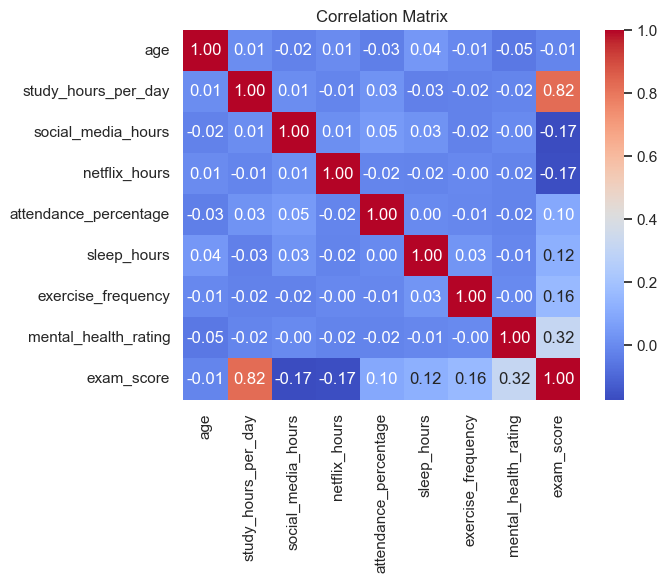

In [21]:
sns.heatmap(dataset.corr(numeric_only=True), annot = True, cmap = 'coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

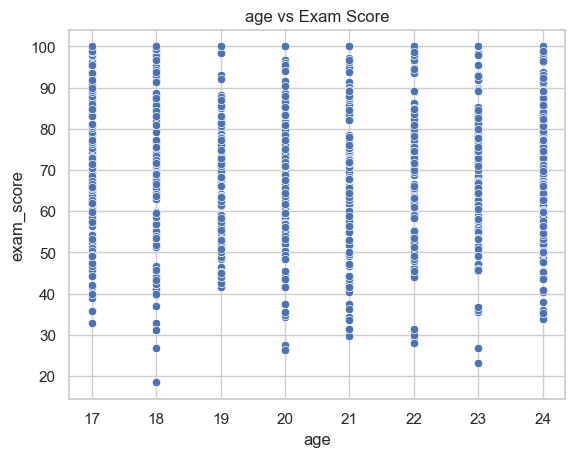

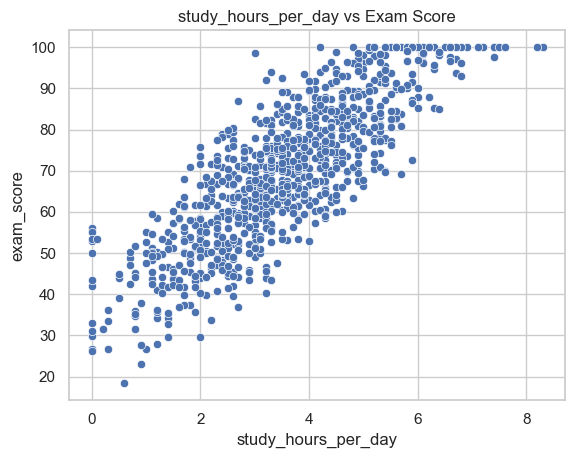

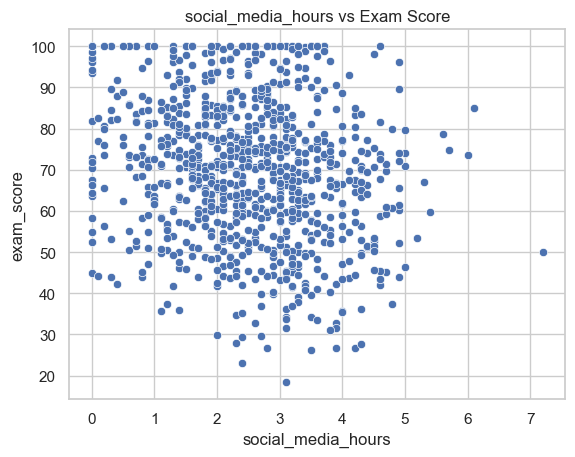

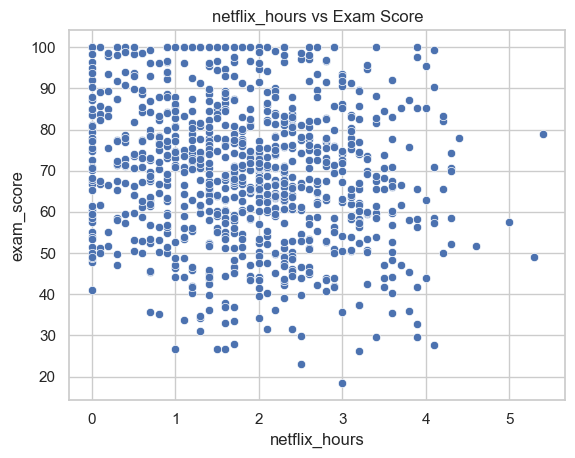

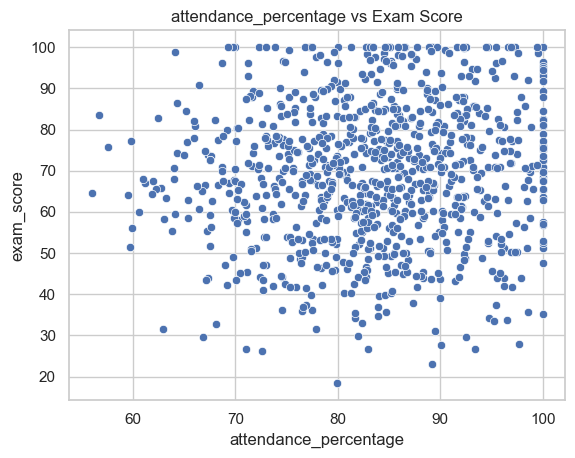

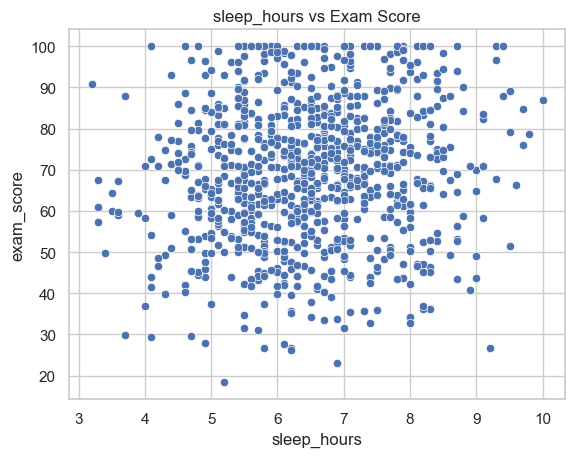

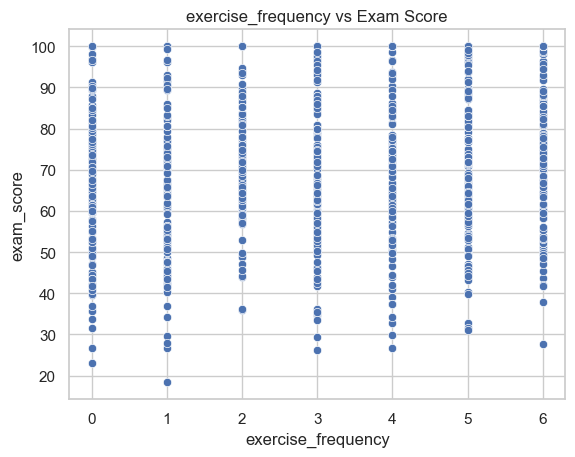

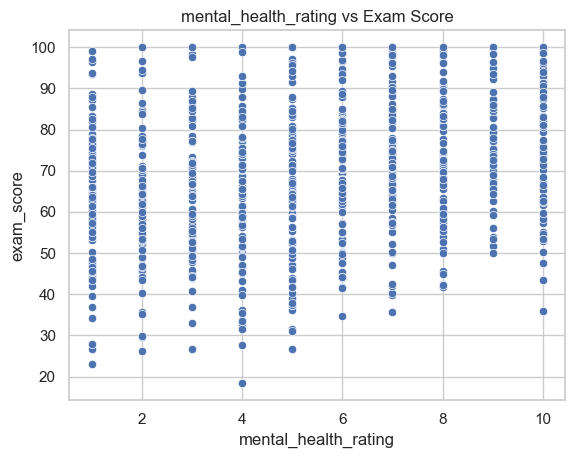

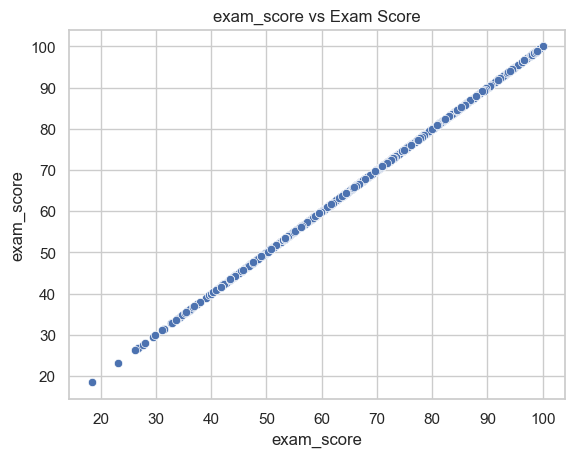

In [23]:
num_features = dataset.describe(include = 'number').columns
num_features

for feature in num_features:
    sns.scatterplot(data = dataset, x = feature, y = 'exam_score')
    plt.title(f'{feature} vs Exam Score')
    plt.show()

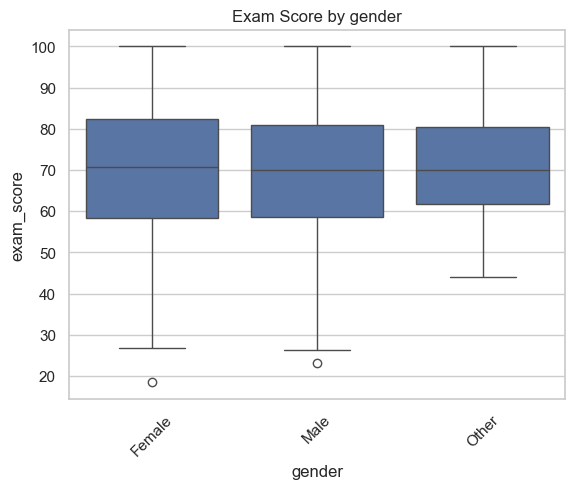

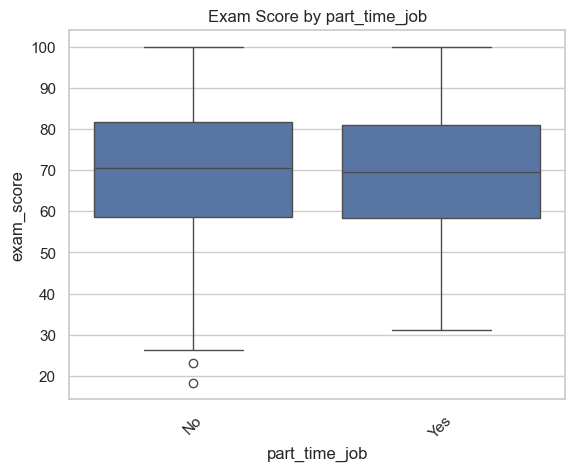

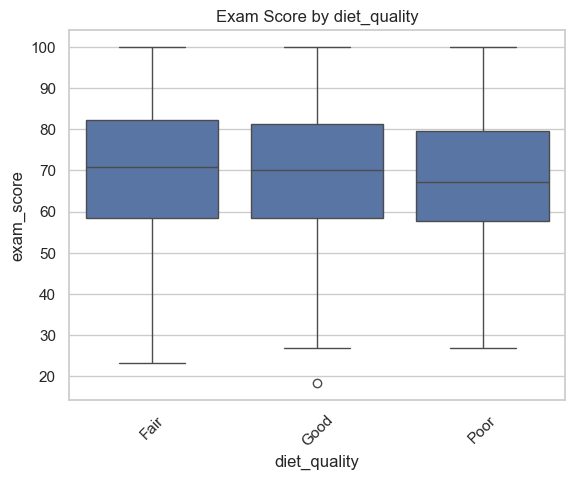

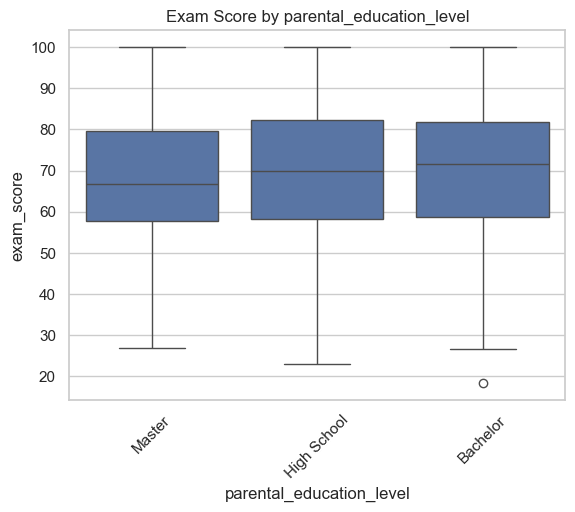

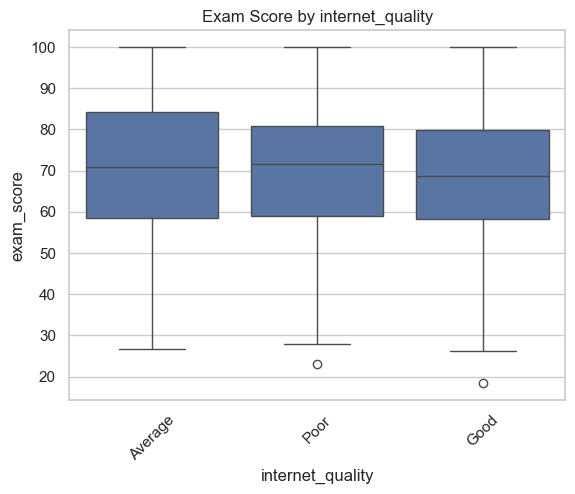

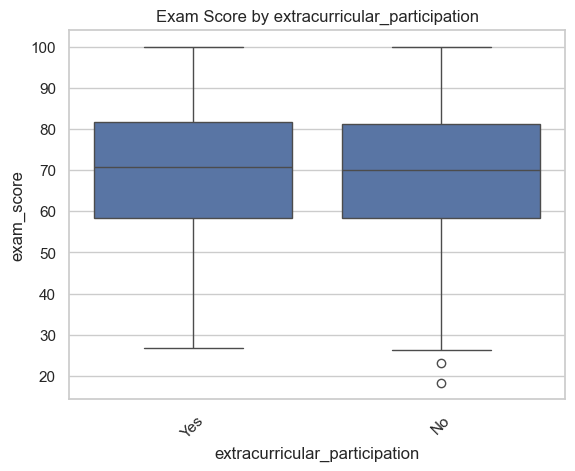

In [26]:
for column in categorical_col:
    sns.boxplot(data = dataset, x = column, y = 'exam_score')
    plt.title(f'Exam Score by {column}')
    plt.xticks(rotation=45)
    plt.show()

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [34]:
features = ['study_hours_per_day', 'attendance_percentage', 'mental_health_rating', 'sleep_hours', 'part_time_job']

target = 'exam_score'

dataset_model = dataset[features+[target]].copy()
dataset_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,No,56.2
1,6.9,97.3,8,4.6,No,100.0
2,1.4,94.8,1,8.0,No,34.3
3,1.0,71.0,1,9.2,No,26.8
4,5.0,90.9,1,4.9,No,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,No,76.1
996,2.9,86.0,6,6.8,Yes,65.9
997,3.0,61.9,9,6.5,No,64.4
998,5.4,100.0,1,7.6,Yes,69.7


In [36]:
encoder = LabelEncoder()
dataset_model['part_time_job'] = encoder.fit_transform(dataset_model['part_time_job'])
dataset_model.head()

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,0,56.2
1,6.9,97.3,8,4.6,0,100.0
2,1.4,94.8,1,8.0,0,34.3
3,1.0,71.0,1,9.2,0,26.8
4,5.0,90.9,1,4.9,0,66.4


In [51]:
x = dataset_model[features]
y = dataset_model[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [54]:
len(y_train)
len(y_test)

182

In [60]:
models = {
    'LinearRegression' : {
        'model' : LinearRegression(),
        'params' : {}
    },
    'DecisionTree' : {
        'model' :  DecisionTreeRegressor(),
        'params' : {'max_depth': [3,5,10], 'min_samples_split' : [2,5]}
    },
    'RandomForest' : {
        'model' : RandomForestRegressor(),
        'params' : {'n_estimators' : [50, 100], 'max_depth' : [5, 10]}
    }
}

In [61]:
best_models = []

for name, config in models.items():
    print(f'Training {name}')
    
    grid = GridSearchCV(config['model'], config['params'], cv = 5, scoring='neg_mean_squared_error')
    grid.fit(x_train, y_train)
    
    y_pred = grid.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    best_models.append({
        'model' : name,
        'best_params' : grid.best_params_,
        'rmse' : rmse,
        'r2' : r2
    })

Training LinearRegression
Training DecisionTree
Training RandomForest


In [62]:
result = pd.DataFrame(best_models)
result.sort_values(by='rmse')

,model,best_params,rmse,r2
0,LinearRegression,{},7.054569,0.808685
2,RandomForest,"{'max_depth': 5, 'n_estimators': 50}",7.486854,0.784520
1,DecisionTree,"{'max_depth': 5, 'min_samples_split': 2}",8.768630,0.704422


In [77]:
import warnings
warnings.filterwarnings("ignore")

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [81]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 6.137155768708508
Mean Squared Error (MSE): 56.05297835280418
Root Mean Squared Error (RMSE): 7.4868537018432635
R² Score: 0.7845197724157541


In [82]:
user_input = [[3, 61.9, 9, 6.5, 0]]
results = model.predict(user_input)
print("Predicted Exam Score:", results)

Predicted Exam Score: [68.31793332]
